## Project 3 Week 3

The final part of this project will involve using the neutrino data used for the *linear cuts analysis* in the first part of the project and feeding it into the *neural network* studied in the second part of the project.

In order to do this there are a couple of important things to note.

The *neutral network* works best with variables that are normalised in some way - this helps the network train and avoid some of the exponential overflow errors that some of you may have seen. One way to do this is with some code such as:

In [0]:
# Set ranges
#for i in range(len(InDataList[0])):

    # Get range from columns
    #MaxVal = max(l[i] for l in InDataList)
    #MinVal = min(l[i] for l in InDataList)

    #for j in range(len(InDataList)):

            #Val = InDataList[j][i]
            #NewVal = -1.0 + (Val-MinVal)*2.0/(MaxVal-MinVal)
            #InDataList[j][i] = NewVal

which forces each variable to have a range of values between -1.0 and +1.0.

Secondly, in the simple example we used last week the *neural network* has a **learning rate** of 1.0 (this is essentially implicit in the code). For problems with low dimensionality this is fine. However with the more complex problem of the neutrino data then a smaller **learning rate** is necessary. The reason for this is that the neural network is essentially looking for some *global minimum* in the parameter space of the problem, however with multi-dimensional data there often (usually) exists *local minima*. If the *neural network* converges to a *local minimum* this does not necessarily correspond to the best solution (*global minimum*).

We therefore need to introduce a **learning rate** into the code from last week, in particular we need a modification along the lines of:

In [0]:
    # were we really sure? if so, don't change too much.
    #learningrate = 0.01
    #Layer3Delta = learningrate * Layer2Error*nonlin(Layer3,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    #Layer1Error = Layer3Delta.dot(Layer2Weights.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    #Layer2Delta = learningrate * Layer1Error * nonlin(Layer2,deriv=True)

It is suggested that you start with values of the **learning rate** such as in the example above. One thing to be aware of however is that if you choose a really small **learning rate** it is possible that the *neural network* will not converge in a small number of training loops.

## Week 3 Tasks

Choose between 3 and 6 of your best discriminators avoiding the *pseudo-discriminators* that we included in the data to make the week 1 tasks a little easier. The *pseudo-discriminators* are:

* energybalance
* piontotale
* effpullx
* effpully
* effpulltime

Feed these into a **MLP** *neural network* that you studied last week. 

When training the *neural network* there are a number of variables/procedures to consider, these are:

* The number of discriminators
* The number of events in the training samples
* The number of training loops
* The number of nodes in the hidden layer
* The learning rate
* The non-linear weighting function (**4th years only**)

**Note** you will not get perfect separation between the 2 classes (*signal* and *background*) of events but it is certainly possible to get a separation that looks something like

<img src="NNout.png" width=500>

You might want to start off with a subset of the pseudo-discriminators to check that everything is working well.

## Week 1 Code

In [2]:
import numpy as np

# Function to build event dictionaries from a file
def BuildEventList(efile):

    # Read variable names from tableformat list
    tableformat = open("/home/user/data/tableformat.dat","r")
    varnames = tableformat.readline().split()

    # Load numpy array
    npevents = np.loadtxt(efile)

    # Event List
    eventlist = []

    # Loop over numpy array and build event objects
    for iev, ev in enumerate(npevents):
        
        # Building events as dictionaries for ease of use
        # Note: This is very inefficient when handling large data samples
        #       but easy to use for now.
        event = {}

        # Loop over variable names given in table format and add as entry
        for jvar, var in enumerate(varnames):

            # Unfilled variables are saved in the file as -999.9
            # replace these with NONE so its clear (NB: this is optional)
            if ev[jvar] == -999.9:
                event[var] = None
            else:
                event[var] = ev[jvar]

        # Push event dictionary into list
        eventlist.append(event)

        # Print out
        if iev % 1000 == 0:
            print ("Built",iev," event dictionaries. Event",iev," has nue=", event["nue"])

    return eventlist

# Build Training Event Samples
signal_training = BuildEventList("/home/user/data/signal_training.dat")
background_training = BuildEventList("/home/user/data/background_training.dat")

Built 0  event dictionaries. Event 0  has nue= 12359.4568403
Built 1000  event dictionaries. Event 1000  has nue= 1481.38114658
Built 2000  event dictionaries. Event 2000  has nue= 2926.3181487
Built 3000  event dictionaries. Event 3000  has nue= 6637.02040283
Built 4000  event dictionaries. Event 4000  has nue= 2133.9351837
Built 5000  event dictionaries. Event 5000  has nue= 1804.49391554
Built 6000  event dictionaries. Event 6000  has nue= 6039.06956359
Built 7000  event dictionaries. Event 7000  has nue= 6661.91921479
Built 8000  event dictionaries. Event 8000  has nue= 1387.25393055
Built 9000  event dictionaries. Event 9000  has nue= 4415.14211858


Built 0  event dictionaries. Event 0  has nue= -495.042051487
Built 1000  event dictionaries. Event 1000  has nue= 1243.33360802
Built 2000  event dictionaries. Event 2000  has nue= 777.611376064
Built 3000  event dictionaries. Event 3000  has nue= 133.234581286
Built 4000  event dictionaries. Event 4000  has nue= -331.649903052
Built 5000  event dictionaries. Event 5000  has nue= 591.254968925
Built 6000  event dictionaries. Event 6000  has nue= 1777.6238274
Built 7000  event dictionaries. Event 7000  has nue= 821.429814313
Built 8000  event dictionaries. Event 8000  has nue= 2035.01020193
Built 9000  event dictionaries. Event 9000  has nue= 1225.75576429


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

nue=np.zeros((10000,2))             #Creating 2D arrays to store the signal and background data of all the arrays
effpullx=np.zeros((10000,2))
negpionmom=np.zeros((10000,2))
piontotale=np.zeros((10000,2))
ntracks=np.zeros((10000,2))
fgdcos=np.zeros((10000,2))
pospions=np.zeros((10000,2))
pospiontheta=np.zeros((10000,2))
pi0elpull=np.zeros((10000,2))
pospionmom=np.zeros((10000,2))
efftime=np.zeros((10000,2))
energybalance=np.zeros((10000,2))
muonmom=np.zeros((10000,2))
effpully=np.zeros((10000,2))
pospionz=np.zeros((10000,2))
muonpos=np.zeros((10000,2))
muoncos=np.zeros((10000,2))
muonpull=np.zeros((10000,2))
muonz=np.zeros((10000,2))
signal_true=np.zeros((10000,2))

for i in range(0,10000):                                        #For loop to append all the signal and background data to the arrays from the lists of dictionaries
    nue[i,0]=signal_training[i].get('nue')
    nue[i,1]=background_training[i].get('nue')
    effpullx[i,0]=signal_training[i].get('effpullx')
    effpullx[i,1]=background_training[i].get('effpullx')
    negpionmom[i,0]=signal_training[i].get('negpionmom')
    negpionmom[i,1]=background_training[i].get('negpionmom')
    piontotale[i,0]=signal_training[i].get('piontotale')
    piontotale[i,1]=background_training[i].get('piontotale')
    ntracks[i,0]=signal_training[i].get('ntracks')
    ntracks[i,1]=background_training[i].get('ntracks')
    fgdcos[i,0]=signal_training[i].get('fgdcos')
    fgdcos[i,1]=background_training[i].get('fgdcos')
    pospions[i,0]=signal_training[i].get('pospions')
    pospions[i,1]=background_training[i].get('pospions')
    pospiontheta[i,0]=signal_training[i].get('pospiontheta')
    pospiontheta[i,1]=background_training[i].get('pospiontheta')
    pi0elpull[i,0]=signal_training[i].get('pi0elpull')
    pi0elpull[i,1]=background_training[i].get('pi0elpull')
    pospionmom[i,0]=signal_training[i].get('pospionmom')
    pospionmom[i,1]=background_training[i].get('pospionmom')
    efftime[i,0]=signal_training[i].get('efftime')
    efftime[i,1]=background_training[i].get('efftime')
    energybalance[i,0]=signal_training[i].get('energybalance')
    energybalance[i,1]=background_training[i].get('energybalance')
    muonmom[i,0]=signal_training[i].get('muonmom')
    muonmom[i,1]=background_training[i].get('muonmom')
    effpully[i,0]=signal_training[i].get('effpully')
    effpully[i,1]=background_training[i].get('effpully')
    pospionz[i,0]=signal_training[i].get('pospionz')
    pospionz[i,1]=background_training[i].get('pospionz')
    muonpos[i,0]=signal_training[i].get('muonpos')
    muonpos[i,1]=background_training[i].get('muonpos')
    muoncos[i,0]=signal_training[i].get('muoncos')
    muoncos[i,1]=background_training[i].get('muoncos')
    muonpull[i,0]=signal_training[i].get('muonpull')
    muonpull[i,1]=background_training[i].get('muonpull')
    muonz[i,0]=signal_training[i].get('muonz')
    muonz[i,1]=background_training[i].get('muonz')
    signal_true[i,0]=signal_training[i].get('signal_true')
    signal_true[i,1]=background_training[i].get('signal_true')

## Week 2 Code with modifications in Week 3

Modified for the training data to be inputted.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

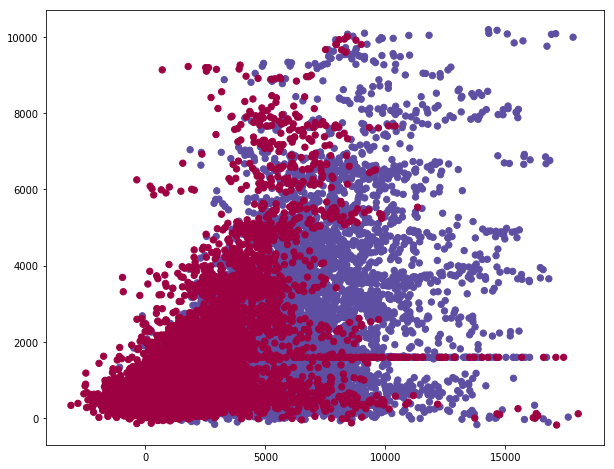

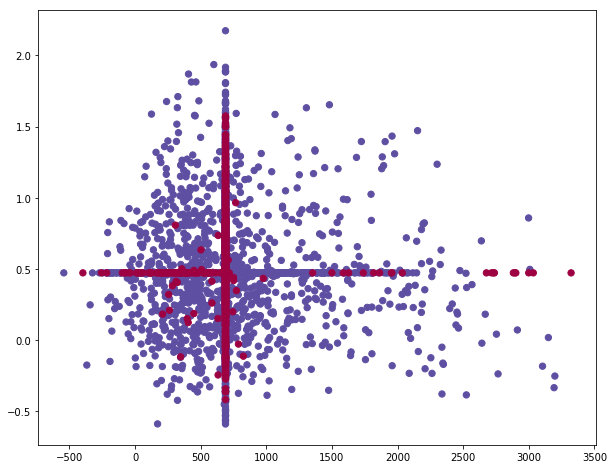

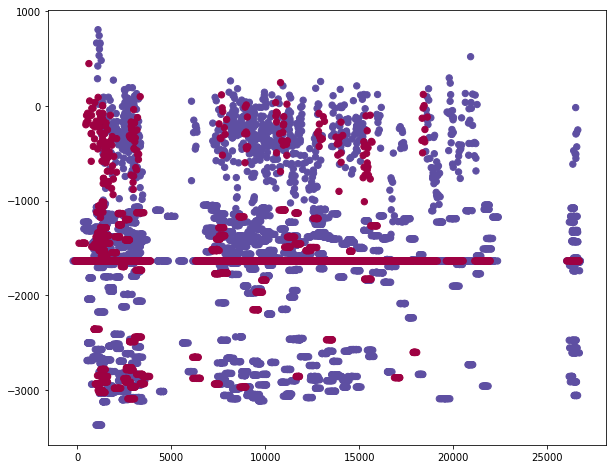

In [6]:
###### Generate a dataset and plot it
#Setup the X and y arrays to put into the neural network function

def die_nan_die(a):
    col_mean = np.nanmean(a, axis=0)
    inds = np.where(np.isnan(a))
    a[inds] = np.take(col_mean, inds[1])
    return a                                #Function to replace nan values in the data with a mean value based on the values around the nans, the nans cause 
                                            #irregularities in array lengths in the NN
X=np.ndarray((20000,6))      #Constructing the X array with all the discriminants you want to consider
X[:10000,0]=nue[:,0]
X[10000:,0]=nue[:,1]
X[:10000,1]=muonmom[:,0]
X[10000:,1]=muonmom[:,1]
X[:10000,2]=negpionmom[:,0]
X[10000:,2]=negpionmom[:,1]
X[:10000,3]=pospiontheta[:,0]
X[10000:,3]=pospiontheta[:,1]
X[:10000,4]=muonz[:,0]
X[10000:,4]=muonz[:,1]
X[:10000,5]=pospionz[:,0]
X[10000:,5]=pospionz[:,1]
die_nan_die(X)

y=np.ndarray((20000))           #Creating the y array which is the supposed output of the neural network, this is the signal_true data for week 1
y[:10000]=signal_true[:,0]
y[10000:]=signal_true[:,1]
y=y.astype(int)

plt.scatter(X[:,0],X[:,1], s=40, c=y, cmap=plt.cm.Spectral)    #Scatter graph of all the data
plt.show()
plt.scatter(X[:,2],X[:,3], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()
plt.scatter(X[:,4],X[:,5], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [7]:
# Set ranges
for i in range(np.shape(X)[1]):
    MaxVal = np.nanmax(X[:,i])
    MinVal = np.nanmin(X[:,i])
    for j in range(np.shape(X)[0]):
            Val = X[j,i]
            NewVal = -1.0 + (Val-MinVal)*2.0/(MaxVal-MinVal)
            X[j,i] = NewVal

In [8]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [9]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [0]:
# Plot the decision boundary
# plot_decision_boundary(lambda x: clf.predict(x))
# plt.title("Logistic Regression")

In [11]:
num_examples = len(X) # training set size
nn_input_dim = 6 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.0001 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [12]:
### Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [13]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [15]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=10000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    if nn_hdim==4:
        print(W1,W2,b1,b2)
    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

In [16]:
#### Build a model with a 3-dimensional hidden layer
# model = build_model(5, print_loss=True)
model2 = build_model(4, print_loss=True)
# model3 = build_model(3, print_loss=True)
#model4 = build_model(2, print_loss=True)
#model5 = build_model(1, print_loss=True)


# Plot the decision boundary
#plot_decision_boundary(lambda x: predict(model, x))
#plt.title("Decision Boundary for hidden layer size 5")

[[ 0.72017135  0.1633635   0.39956811  0.91484082]
 [ 0.76242736 -0.39897202  0.38787197 -0.06179132]
 [-0.04213892  0.16762614  0.05880554  0.59370467]
 [ 0.31069235  0.04967362  0.18120641  0.13622197]
 [ 0.60995523 -0.08375551  0.12780935 -0.34868313]
 [-1.04225373  0.26683867  0.3529046  -0.3029876 ]] [[ 1.13487731 -0.72718284]
 [ 0.02287926 -0.09359193]
 [ 0.76638961  0.73467938]
 [ 0.07747371  0.18908126]] [[0. 0. 0. 0.]] [[0. 0.]]
Loss after iteration 0: 0.882510


Loss after iteration 1000: 0.466873


Loss after iteration 2000: 0.449854


Loss after iteration 3000: 0.446089


Loss after iteration 4000: 0.445157


Loss after iteration 5000: 0.443894


Loss after iteration 6000: 0.442909


Loss after iteration 7000: 0.442222


Loss after iteration 8000: 0.441633


Loss after iteration 9000: 0.441155


In [18]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model2, x))
plt.title("Decision Boundary for hidden layer size 5")

ValueError: shapes (90000,2) and (6,4) not aligned: 2 (dim 1) != 6 (dim 0)

In [0]:
#plt.figure(figsize=(16, 32))
#hidden_layer_dimensions = [1, 2, 3, 4, 5]
#for i, nn_hdim in enumerate(hidden_layer_dimensions):
    #plt.subplot(5, 2, i+1)
    #plt.title('Hidden Layer size %d' % nn_hdim)
    #model = build_model(nn_hdim)
    #plot_decision_boundary(lambda x: predict(model, x))
#plt.show()

# Reflection on the tasks set for Part 3

## General Findings

### 1. Discriminators

As you increase the number of discriminators, you need more nodes in the hidden layer to deal with the added complexity and obtain a good loss of background 

### 2. Events

The more events being fed into the neural network from the discriminators, the clearer the decision boundary becomes. The neural network learns more effectively the more events you give it to work with.

### 3. Training Loops

Less training loops gives a less defined decision boundary.

### 4. Nodes in the Hidden Layer

The more discriminators you are considering at once, say 6 instead of 3, the more nodes you need in the hidden layer because it is a more complex scenario. For example, a hidden layer of 3 nodes seems very effective at dealing with just 2 discriminators. This is not the case when you increase the number of discriminators to 6. Three is not sufficient as it simply gives a straight line through all the data as a decision boundary. For 6 discriminators, 5 nodes in the hidden layer seems effective.

### 5. Learning Rate

Unsure as of yet how learning rate is affected. Come back to this later.

## Specific Example: 6 Discriminators

For this example, the discriminators used were nue, muonmom, negpionmom, pospiontheta, muonz, pospionz. The variables mentioned above were varied and the results were as follows.

### Initial Results

Using the initial values of 0.000005 for learning rate, 20000 training loops and 20000 events the best loss after iteration was 0.431655 for 5 hidden nodes. These values were later changed to observe how it affected the loss after iteration. The values were only changed by singularly, the other values were kept at the default ones defined above. This is to observe how each individual variable affects the neural network's learning.

### Events

The whole data set was used for these discriminants, anything less than 20,000 (10,000 signal and 10,000 background) would not be a true reflection of the data as a whole.

### Training Loops

The number of loops was set to 10,000 and 20,000. The results were, 0.442250 and 0.431665 for 5 hidden nodes. This shows a noticeable improvement when you give the neural network more loops to train itself to isolate signal data. This is what is expected.

### Nodes in the Hidden Layer

For 5 hidden nodes, the result mentioned above was obtained. For 4, 0.441622, 3, 0.450775, 2, 0.459294 and 1 0.477168. This clearly shows that the more complex a scenario, the more discriminating variables you have, more hidden nodes means you will obtain a better loss value. However, if you use too many hidden nodes you will run into overtraining. This is where the neural network becomes overfamiliar with the system and tries to plot decision boundaries that don't make sense.

### Learning Rate

Learning rates of 0.000005 and 0.0001 were used to see if increasing the learning rate improved the loss value. 0.429576 was obtained for 0.0001 as the learning rate which is a lower values than for 0.000005. Therefore, if you increase the learning rate, the loss after each iteration is greater.

# Graphs of Decision Boundaries

I was unable to plot these due to the graphs not taking an array that had more than 2 dimensions along the x or y axis. A crude solution to this would be to plot the decision boundaries for each pair of discriminators you are considering but this is impractical when you start using more discriminators. However, the loss after iteration values gives a good indication of how much background data is being cut from the system.
